In [6]:
from model.classification_model import ClassifierModel
from sklearn import metrics

from asid.automl_imbalanced.abb import AutoBalanceBoost

import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, RobustScaler

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split


import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

from hyperopt import hp, fmin, tpe

from model.reduce_model import ReduceModel, AE, VAE

from plot_settings import ide_plot

# plot settings
ide_plot()

In [2]:
dataset = pd.read_csv("main_datasets/dataset.csv", index_col=0)
target = pd.read_csv("main_datasets/target.csv", index_col=0)

In [26]:
reduce_model = ReduceModel(model="AE", layers=(1145, 500, 200, 10))

In [27]:
reduce_model.train(epochs=100, lr=1e-4)

100%|██████████| 100/100 [00:32<00:00,  3.08it/s]

Epoch 100, Train Loss: 0.006565070180438979
Epoch 100, Validation Loss: 0.0066025613129816274


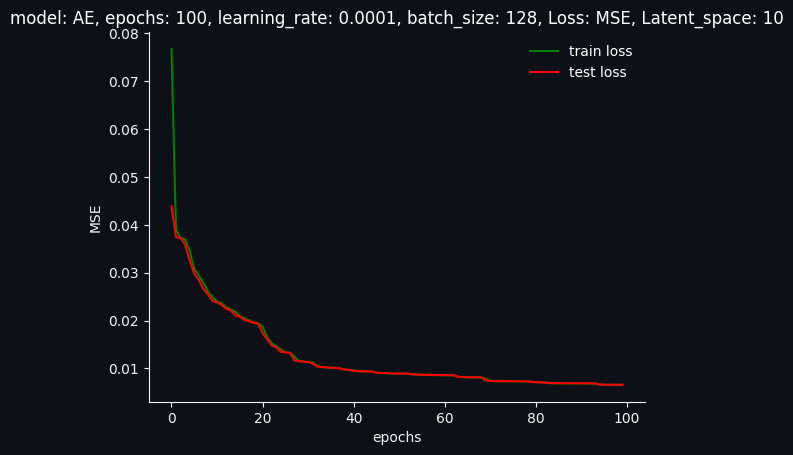

In [28]:
reduce_model.plot_loss()

In [29]:
main_reduced = reduce_model.transform(dataset)

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\droid\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\interactiveshell.py", line 3508, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\droid\AppData\Local\Temp\ipykernel_20596\4136792401.py", line 1, in <module>
    main_reduced = reduce_model.transform(dataset)
  File "c:\Users\droid\Projects\phase_transmition_ML\model\reduce_model.py", line 459, in transform
    x_reduced = self.model._transform(x_torch)
  File "c:\Users\droid\Projects\phase_transmition_ML\model\reduce_model.py", line 186, in _transform
    return self.encoder(x)
  File "C:\Users\droid\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\torch\nn\modules\module.py", line 1501, in _call_impl
    return forward_call(*args, **kwargs)
  File "C:\Users\droid\AppData\Local\Package

In [7]:
pd.DataFrame(main_reduced).hist(bins=20)

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\droid\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\interactiveshell.py", line 3508, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\droid\AppData\Local\Temp\ipykernel_20596\743624489.py", line 1, in <module>
    pd.DataFrame(main_reduced).hist(bins=20)
NameError: name 'main_reduced' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\droid\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\interactiveshell.py", line 2105, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
  File "C:\Users\droid\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\c

In [8]:
def tsne_plot(x1, y1, name):
    tsne = TSNE(n_components=2, random_state=0)
    X_t = tsne.fit_transform(x1)

    plt.figure(figsize=(12, 8))
    plt.scatter(X_t[np.where(y1 == 0), 0], X_t[np.where(y1 == 0), 1], marker='o', color='g', linewidth=1, alpha=0.8, label='0')
    plt.scatter(X_t[np.where(y1 == 1), 0], X_t[np.where(y1 == 1), 1], marker='o', color='r', linewidth=1, alpha=0.8, label='1')
    plt.title(name)
    plt.legend()
    plt.show()

def pca_plot(x1, y1, name):
    pca = PCA(n_components=2, random_state=0)
    X_t = pca.fit_transform(x1)

    plt.figure(figsize=(12, 8))
    plt.scatter(X_t[np.where(y1 == 0), 0], X_t[np.where(y1 == 0), 1], marker='o', color='g', linewidth=1, alpha=0.8, label='0')
    plt.scatter(X_t[np.where(y1 == 1), 0], X_t[np.where(y1 == 1), 1], marker='o', color='r', linewidth=1, alpha=0.8, label='1')
    plt.title(name)
    plt.legend()
    plt.show()

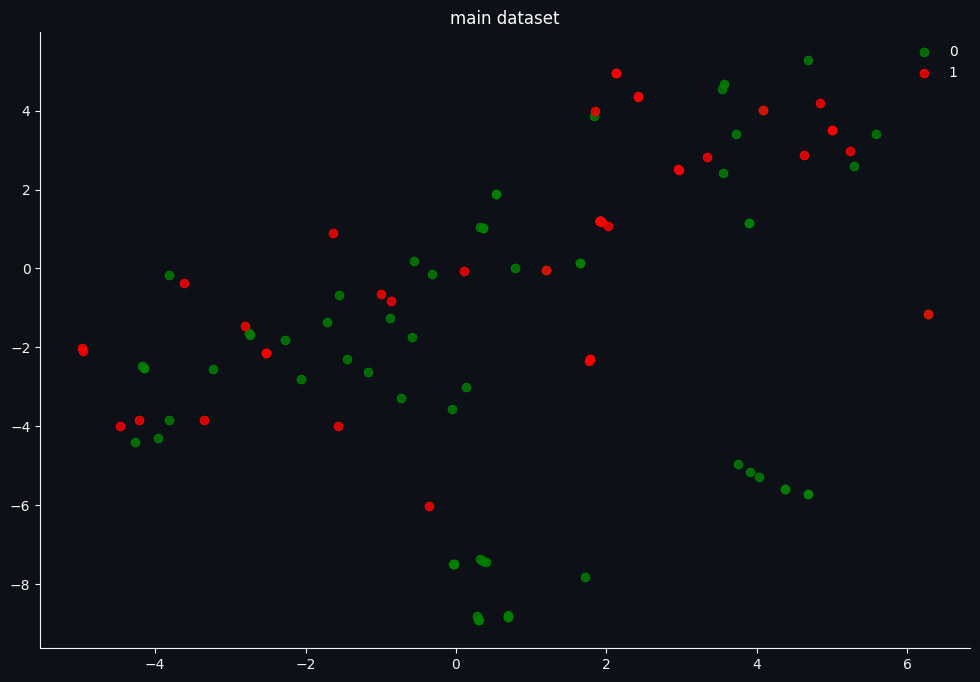

In [9]:
tsne_plot(dataset, target, "main dataset")

In [10]:
tsne_plot(main_reduced, target, "reduced main dataset")

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\droid\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\interactiveshell.py", line 3508, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\droid\AppData\Local\Temp\ipykernel_20596\3151259764.py", line 1, in <module>
    tsne_plot(main_reduced, target, "reduced main dataset")
NameError: name 'main_reduced' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\droid\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\interactiveshell.py", line 2105, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
  File "C:\Users\droid\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-pa

In [11]:
from imblearn.over_sampling import SMOTE, RandomOverSampler

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    main_reduced, target.values.ravel(), test_size=0.2, random_state=0)

# X_train, y_train = SMOTE(random_state=42).fit_resample(X_train, y_train)


scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\droid\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\interactiveshell.py", line 3508, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\droid\AppData\Local\Temp\ipykernel_20596\1303541275.py", line 2, in <module>
    main_reduced, target.values.ravel(), test_size=0.2, random_state=0)
NameError: name 'main_reduced' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\droid\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\interactiveshell.py", line 2105, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
  File "C:\Users\droid\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Pytho

In [13]:
pd.DataFrame(X_train).hist(bins=20)

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\droid\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\interactiveshell.py", line 3508, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\droid\AppData\Local\Temp\ipykernel_20596\867681939.py", line 1, in <module>
    pd.DataFrame(X_train).hist(bins=20)
NameError: name 'X_train' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\droid\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\interactiveshell.py", line 2105, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
  File "C:\Users\droid\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\ultrat

In [14]:
c_model = ClassifierModel()

In [15]:
res = c_model.cv(pd.DataFrame(X_train), pd.DataFrame(y_train))

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\droid\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\interactiveshell.py", line 3508, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\droid\AppData\Local\Temp\ipykernel_20596\225778484.py", line 1, in <module>
    res = c_model.cv(pd.DataFrame(X_train), pd.DataFrame(y_train))
NameError: name 'X_train' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\droid\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\interactiveshell.py", line 2105, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
  File "C:\Users\droid\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-p

In [16]:
res

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\droid\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\interactiveshell.py", line 3508, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\droid\AppData\Local\Temp\ipykernel_20596\1158820258.py", line 1, in <module>
    res
NameError: name 'res' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\droid\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\interactiveshell.py", line 2105, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
  File "C:\Users\droid\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\ultratb.py", line 1396, in structured_tra

In [17]:
c_model.set_params({name: {param: res[name][param] for param in res[name] if param not in ("balance", "score")} for name in res})

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\droid\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\interactiveshell.py", line 3508, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\droid\AppData\Local\Temp\ipykernel_20596\2988749952.py", line 1, in <module>
    c_model.set_params({name: {param: res[name][param] for param in res[name] if param not in ("balance", "score")} for name in res})
NameError: name 'res' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\droid\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\interactiveshell.py", line 2105, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
  File "C:\Users\droid\AppData\Local\Packages\PythonSoftwareFoundation.Pyth

In [18]:
c_model.fit(X_train, y_train)

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\droid\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\interactiveshell.py", line 3508, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\droid\AppData\Local\Temp\ipykernel_20596\3995717071.py", line 1, in <module>
    c_model.fit(X_train, y_train)
NameError: name 'X_train' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\droid\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\interactiveshell.py", line 2105, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
  File "C:\Users\droid\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\ultratb.py"

In [19]:
for name in c_model.models:
    print(f"report for {name}")
    print(metrics.classification_report(y_test, c_model.models[name].predict(X_test)))

Traceback (most recent call last):


report for CatBoost
Unexpected exception formatting exception. Falling back to standard exception


  File "C:\Users\droid\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\interactiveshell.py", line 3508, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\droid\AppData\Local\Temp\ipykernel_20596\2775398092.py", line 3, in <module>
    print(metrics.classification_report(y_test, c_model.models[name].predict(X_test)))
NameError: name 'y_test' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\droid\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\interactiveshell.py", line 2105, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
  File "C:\Users\droid\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython

In [20]:
def roc_auc_plot(clf_model: ClassifierModel, x_test, y_test):
    plt.figure()
    lw = 2
    plt.plot()
    for clf in clf_model.models:
        pred_proba = clf_model.models[clf].predict_proba(x_test)
        fpr, tpr, threshold = metrics.roc_curve(y_test, pred_proba[:,1])
        auc = metrics.auc(fpr, tpr)
        plt.plot(fpr,
                 tpr,
                 label=f"ROC curve {clf} (area={auc:.2f})")
    plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver operating characteristic example")
    plt.legend(loc="lower right")
    plt.show()

def roc_auc_plot_one(clf: object, x_test, y_test):
    plt.figure()
    lw = 2
    plt.plot()
    pred_proba = clf.predict_proba(x_test)
    fpr, tpr, threshold = metrics.roc_curve(y_test, pred_proba[:,1])
    auc = metrics.auc(fpr, tpr)
    plt.plot(fpr,
             tpr,
             label=f"ROC curve: (area={auc:.2f})")
    plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver operating characteristic example")
    plt.legend(loc="lower right")
    plt.show()

In [21]:
roc_auc_plot(c_model, X_test, y_test)

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\droid\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\interactiveshell.py", line 3508, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\droid\AppData\Local\Temp\ipykernel_20596\2989723238.py", line 1, in <module>
    roc_auc_plot(c_model, X_test, y_test)
NameError: name 'X_test' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\droid\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\interactiveshell.py", line 2105, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
  File "C:\Users\droid\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\ultr

In [22]:
from asid.automl_imbalanced.abb import AutoBalanceBoost
from catboost import CatBoostClassifier
from model.classification_model import AdaBoostClf

In [23]:
c = AutoBalanceBoost().fit(X_train, y_train)

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\droid\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\interactiveshell.py", line 3508, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\droid\AppData\Local\Temp\ipykernel_20596\522595160.py", line 1, in <module>
    c = AutoBalanceBoost().fit(X_train, y_train)
NameError: name 'X_train' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\droid\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\interactiveshell.py", line 2105, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
  File "C:\Users\droid\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\co

In [24]:
print(metrics.classification_report(y_test, c.predict(X_test)))

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\droid\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\interactiveshell.py", line 3508, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\droid\AppData\Local\Temp\ipykernel_20596\194808119.py", line 1, in <module>
    print(metrics.classification_report(y_test, c.predict(X_test)))
NameError: name 'y_test' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\droid\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\interactiveshell.py", line 2105, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
  File "C:\Users\droid\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-p

In [25]:
roc_auc_plot_one(c, X_test, y_test)

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\droid\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\interactiveshell.py", line 3508, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\droid\AppData\Local\Temp\ipykernel_20596\4012922283.py", line 1, in <module>
    roc_auc_plot_one(c, X_test, y_test)
NameError: name 'c' is not defined

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\droid\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\interactiveshell.py", line 2105, in showtraceback
    stb = self.InteractiveTB.structured_traceback(
  File "C:\Users\droid\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\IPython\core\ultratb.py"